# Data Analysis on Socioeconomic and Crime Trends in Chicago
__Team Name__: Data Pirates<br>
__Team Members__: Arsalan Babar • Imran Babar • Vraj Patel • Dilip Vemuri • Jason Yeoh<br>
__Course/Term__: CS 418 (Spring 2019)

# DATA
- __Crimes in Chicago Since 2001__ [dataFiltered.csv]<br>
Very large dataset. Required cleaning. Only needed the data from the years 2008 to 2012. In order to clean the data, the group fixed structural errors, removed unwanted outliers, and wrote a python script for cleaning. <br>

- __Chicago Population (2010)__ [ChicagoPopulation.csv]<br>
Gives the population for 77 neighborhoods in Chicago<br>

With these two datasets, the team joined it on Community Area Number to get the crime rate per neighborhood.

In [4]:
def f(row):
    return round ((row['Crime Count'] / row['Population'])*100, 2)

crimes = pd.read_csv("dataFiltered.csv")
population = pd.read_csv("ChicagoPopulation.csv")
population = population.set_index('Community Area Number')
crimes['Year'] = crimes['Year'].fillna(0.0).apply(np.int64)
crime = crimes.groupby('Community Area').count()['ID'].reset_index(name="Crime Count")
crime = crime.join(population, on="Community Area")
crime['Population '] = crime['Population '].fillna(0.0).apply(np.int64)
crime['Community Area'] = crime['Community Area'].fillna(0.0).apply(np.int64)
crime.columns = ['Community Area', 'Crime Count', 'Population']
crime = crime.drop([0])
crime['Crime Rate'] = crime.apply(f, axis=1)
crime.head()

,Community Area,Crime Count,Population,Crime Rate
1,1,7748,54991,14.09
2,2,6722,71942,9.34
3,3,7271,56362,12.90
4,4,3537,39493,8.96
5,5,2945,31867,9.24


- __Socioeconomic Trends__ <br> 
Not very large data set. Easy to utilize. The team fixed structural errors and dropped null values.<br>
Dataset name: __ChicagoSocioecon.csv__

In [5]:
socioecon = pd.read_csv("ChicagoSocioecon.csv")
socioecon['Community Area Number'] = pd.to_numeric( socioecon['Community Area Number'], downcast='signed')
socioecon['Community Area Number'] = socioecon['Community Area Number'].fillna(0.0).apply(np.int64)
socioecon['HARDSHIP INDEX'] = socioecon['HARDSHIP INDEX'].fillna(0.0).apply(np.int64)
socioecon = socioecon.set_index('Community Area Number')
socioecon = socioecon.dropna()
socioecon.head()

,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Community Area Number,,,,,,,,
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


- __Chicago Map Boundaries [USED FOR VISUALIZATION]__<br>
This dataset provides the geometrical specifications (such as perimeter, area, shape) of each of the 77 Chicago neighborhood.

In [6]:
chicago_map = gpd.read_file("geo_export_7740d8e1-a704-49b1-8276-e70c37a786a0.shp")
chicago_map['Community Area Number'] = pd.to_numeric(chicago_map['area_num_1'], downcast='signed')
chicago_map = chicago_map.drop(['comarea', 'comarea_id', 'perimeter', 'area', 'area_numbe', 'area_num_1'], axis=1)
chicago_map = chicago_map.set_index('Community Area Number').sort_values(by="Community Area Number")
chicago_map.head()

,community,shape_area,shape_len,geometry
Community Area Number,,,,
1,ROGERS PARK,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...
2,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((-87.6846530946559 42.0194847726953, ..."
3,UPTOWN,6.509564e+07,46972.794555,POLYGON ((-87.64102430213292 41.95480280553257...
4,LINCOLN SQUARE,7.135233e+07,36624.603085,"POLYGON ((-87.6744075678037 41.97610340441675,..."
5,NORTH CENTER,5.705417e+07,31391.669754,"POLYGON ((-87.67336415409336 41.9323427446535,..."


# MLAnalysis

## [ML-1] NEIGHBORHOOD INCOME PREDICTOR

In this ML model, we developed a model that predicts income level based on __crimes__ and __socioeconomic factors__. __Neighborhood income levels__ are subdivided into five classes: (a) very high income (top 20%), (b) high income (upper 20%), (c) middle income (mid 20%), (d) low income (lower 20%), and (e) very low income  (bottom 20%) neighborhoods.

- __ENCODING, LABELING AND DATA SPLITTING__<br>
In this section, our group encoded the values on PCI (per capita income) metric into bins of income levels. Each bin corresponds to an income bracket. The rest of the columns were selected to be the features. Moreover, we used these data to split it into training and testing datasets.

- __DATA TRAINING AND PREDICTING__<br>
In this segment of ML analysis, we used a classifier to train and predict testing and training datasets, and report performance based on a number of metrics. To get an accurate performance scores, the team aggregated the results on training and getting prediction on a classifier five times.

- __EVALUATING PERFORMANCE__<br>
Based on the following metrics: (a) training time, (b) prediction time, (c) accuracy score for test & train datasets, and (d) F1 score for test & train data, __Random Forest Classifier__ looks viable as it scored the highest in accuracy and F1 score metrics, in which it gives the most accurate and precise prediction among the other three classifiers such as KNeighbors, Decision Tree, and Gaussian Naive-Bayes.
- __FEATURE IMPORTANCE__<br>
The team also take into account the features' importance to the label. Socioeconomic indicator __PAWHS__ (Percent Aged 25+ without High School Diploma) seem to be the most influential factor contributing to a neighborhood's income level, followed by PHBP (Percent Households Below Poverty), and PAUN (Percent Aged 16+ Unemployed).

- __HYPERPARAMETER TUNING__<br>
After finding the best classifier for our datasets, the team tried to optimize the performance of the Random Forest Classifier by finding the right configuration. Using GridSearchCV, we were able to find the best classifier model parameters.
    
- __USING PREDICTION MODEL__<br>
In order to predict the label, the user must give inputs in the following order:
 * __PHC__ - Percent of Housing Crowded
 * __PHBP__ - Percent Households Below Poverty
 * __PAUN__ - Percent Aged 16+ Unemployed
 * __PAWHS__ - Percent Aged 25+ without High School Diploma
 * __PAU18__ - Percent Aged Under 18 or Over 64
 * __PCC__ - Crime Rate
    
For full ML analysis, visit https://github.com/edgeslab/CS418-Project/blob/master/IncomeLevelPredictor.ipynb

In [12]:
labels = ['TOP 20%', 'UPPER 20%', 'MID 20%', 'LOWER 20%', 'BOTTOM 20%']

data = [ [30, 20, 30, 30, 30, 6000],   # Community 1
         [20, 20, 25, 25, 35, 10000],  # Community 2
         [15, 12, 9, 5, 44, 100]       # Community 3
       ]

for community, income_level in enumerate(new_clf.predict(data)):
   print( "Community {} is predicted to be in the income level of {}.".format(community+1, labels[income_level]) )

Community 1 is predicted to be in the income level of MID 20%.
Community 2 is predicted to be in the income level of LOWER 20%.
Community 3 is predicted to be in the income level of TOP 20%.


## [ML-2] DECISION TREE REGRESSION

We are using the Chicago Socioeconomic Dataset to try and predict Per Capita Income (in US DOLLARS) in the Chiago Neighborhoods for each community area number based upon % of Housing Crowded, % Households below poverty, % aged 16+ unemployed, % Aged 25+ without highschool diploma,	% aged under 18 OR over 64. The two graphs below show the Visualization of the machine learning model built using Decision Tree Regression. It is pretty close to actual values, if you see closely. In short, this model is taking in to account all the socioeconmic factors and spitting out the values for per capita income which it believes should go with that specific neighborhood based on other socioeconomic data and then we can compare it to the actual values to see what the difference is and which neighborhoods have more than required per capita income or which neighborhoods are poorer than they should have been. This model is showing that some neigborhoods have more per capita income than what was expected and many have lower than what was expected. Thus, It is directly related to our hypothesis of economic polarization in Chicago.


- __PREPROCESSING AND DESCRIBING THE DATA__<br>
After data cleaning and making an exploratory data analysis, the team looked into different socioeconomic factors that contributes to a community's per capita income.
- __DATA TRAINING__<br>
The team decided to split the dataset to train 80% and to test 20% of it. It is showing the comparison between the predicted data from the trained data set and we can compare it to the actual to see the difference
- __MODEL STATISTICS__<br>
The mean absolute error for our algorithm is 3955.5, which is less than 10 percent of the mean of all the values in the 'Per Capita Income' column. This means that our algorithm did a fine prediction job.

In [4]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4014.0625
Mean Squared Error: 129813770.4375
Root Mean Squared Error: 11393.584617560007


- __VISUALIZE DECISION TREE REGRESSION__<br>
The chart below portrays how the actual values fare with the predicted values using the Decision Tree Regression classifier.

Text(0, 0.5, 'Per Capita Income')

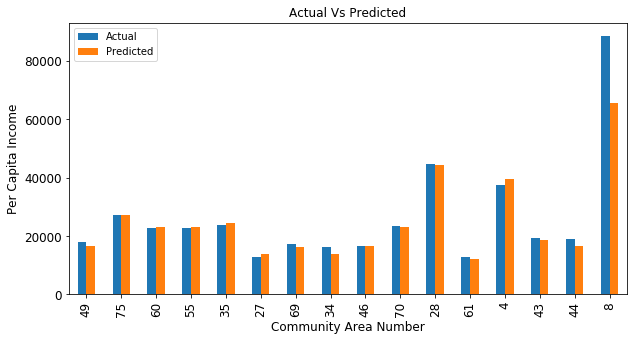

In [15]:
ax = df[['Actual','Predicted']].plot(kind='bar', title ="Actual Income Vs Predicted Income", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Community Area Number", fontsize=12)
ax.set_ylabel("Per Capita Income", fontsize=12)

# Visualization
## [VIZ-1] Socioeconomic Metrics of different neighborhood income classes in Chicago
The visualization below portrays the various socioeconomic metrics which have a significant impact on crime rate. The visualizations is based on neighborhood's average income. Dark blue bars represent neighborhoods who have very high income (top 20% in income levels). Yellow bars represent the middle class neighborhoods. While, the red bars show the bottom 20% income neighborhoods. The visualization below clearly shows neighborhoods with very low income have highest crime rates, poverty level, unemployment rate, and high school dropout rates.

<img src="img/Bargraph.png" style="width: 800px;"/>

## [VIZ-2] Per Capita Income vs Crime Count Visualization
The visulization below proves that per Capita Income and crime rate are inversely related to one another. As the crime rate increases at a certain neighborhood, its income level drops down. The scatter plot graph brilliantly depicts the indirect correlation between the two variables. 

<img src="img/Scatterplot.png" style="width: 400px;"/>

# Additional work

## [VIZ-3] Unemployment Rate VS Crime Count
The visualizations below are called __geospatial map__. We created an entire map of city of Chicago. The map on the left shows the unemployment rate percentages of all different Chicago community areas. Dark red areas represent where unemployment percentage is very high and dark blue color indicates where unemployment percentage is very low. Similarly on the right, the geospatial map shows crime counts per Chicago community area. Dark red areas represent neighborhoods with the most crime count and dark blue areas represent neighborhoods with the least crime count. After doing a thorough side-by-side anlaysis on the two visualizations below, we found that areas where unemployment rate is high, have higher crime counts and vice-versa. Thus, the visualization shows a direct correlation between unemployment rate and crime count in city of Chicago. 

![title](img/viz.png)

# Results 
After doing a thorough data analysis, many significant insights were found. We have found that middle class is actually disappearing in the City of Chicago as per our hypothesis. Using Pew research guidleines on poverty levels, Per Capita income of majority of neighborhoods show that majority of the neighborhoods are below poverty level. Also another conclusion we can make is that after looking at the per capita income visualization per community from above, we have noted that communities with low income have higher crime counts. Thus, we believe that per capita income has major effects on crime rate in chicago This is a very imporatant insight in this project. Another insight, we have understood is that not having a highschool diploma also has impacts on crime counts. After closely analyzing the "Highschool Education in Each Community" visualization(part of progress report) and comparing it against "Crime count per Chicago Community Area" visualization, we analyzed that communities with higher high school dropouts have higher crime counts. Its a direct relationship. This was another very interesting insight. Another important insight we found was that areas where unemployment rate was high, had higher crime percantages and vice-versa. Unemployment Rate and Crime Rate are directly correlated.  These are a few concrete result we can show based on our data analysis and viusalizations above, we can conclude the following:
As per capita income goes up the crime count decreases.(per community). As unemployment rate goes up the crime count increases.(per community). As high drop out rate increases, the crime count increases.(per community). Also, there are some neighborhoods which are way richer than expectations and alot more neighborhoods which are way pooerer than expectation. This can be seen from the Machine Learning model called 'Decision Tree using regression' above. 


